#### Detect if faces are valid

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import torch
import numpy as np

In [3]:
from fb_utils import set_device, get_dataloader, get_pytorch_model

In [4]:
from UTKFace_train_utils import get_df_files, get_image_databunch, get_gen_acc

Reference: https://github.com/thiagodma/Pytorch_exs/blob/master/MultiTaskLearning/multitask_age_gender_ethnicity_resnet34.ipynb

In [5]:
torch.cuda.set_device(1)
device, kwargs = set_device(device_name="cuda:1")
print(device, kwargs)
torch.cuda.empty_cache()

cuda:1 {'num_workers': 1, 'pin_memory': True}


## Creating binary dataframes

In [6]:
df_gender = get_df_files(concept='gender')

In [8]:
df_train, df_valid = get_df_files(concept='gender', df_all_concepts=True)

In [12]:
print(f"train: {len(df_train)}, valid:{len(df_valid)}")

train: 23366, valid:9722


In [13]:
df_gender

,image_id,gender,is_valid
0,UTKFace/58_0_3_20170119211544361.jpg.chip.jpg,0,False
1,UTKFace/38_0_0_20170116224644283.jpg.chip.jpg,0,False
2,UTKFace/18_1_0_20170109214216731.jpg.chip.jpg,1,False
3,UTKFace/32_1_3_20170109142352309.jpg.chip.jpg,1,False
4,UTKFace/26_1_0_20170117153211341.jpg.chip.jpg,1,False
...,...,...,...
9717,crop_part1/2_1_2_20161219161934567.jpg.chip.jpg,1,True
9718,crop_part1/2_1_4_20161221192754807.jpg.chip.jpg,1,True
9719,crop_part1/1_0_2_20161219212824950.jpg.chip.jpg,0,True
9720,crop_part1/38_1_0_20170104200929513.jpg.chip.jpg,1,True


## Creating Dataset, dataloader and databunch

In [14]:
data_gender = get_image_databunch(df_gender)

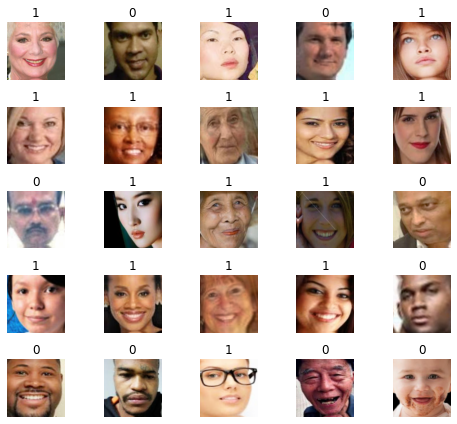

In [15]:
data_gender.show_batch(rows=5, figsize=(7,6))

## Create Models

In [40]:
learn_gender = cnn_learner(data_gender, models.resnet50, metrics=accuracy, callback_fns=ShowGraph)
learn_gender.freeze()

In [47]:
learn_gender.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


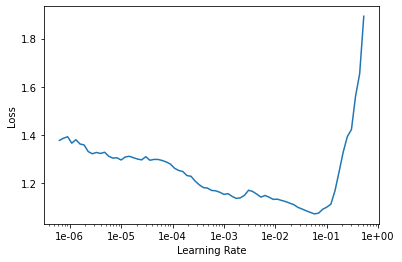

In [48]:
learn_gender.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,0.384919,0.349646,0.835939,01:45
1,0.292962,0.347542,0.834705,01:45
2,0.280608,0.410823,0.815161,01:45
3,0.270923,0.312280,0.858157,01:45
4,0.253173,0.306188,0.866386,01:45
5,0.238546,0.274389,0.877391,01:45
6,0.227565,0.264382,0.880169,01:45
7,0.197489,0.246234,0.891895,01:45
8,0.187723,0.242438,0.896935,01:45
9,0.193063,0.202731,0.909484,01:45


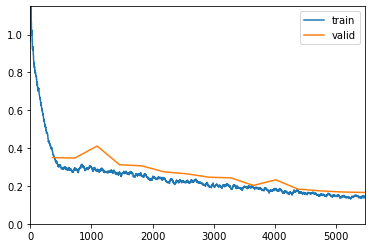

Better model found at epoch 0 with valid_loss value: 0.3496460020542145.
Better model found at epoch 1 with valid_loss value: 0.3475422263145447.
Better model found at epoch 3 with valid_loss value: 0.31228041648864746.
Better model found at epoch 4 with valid_loss value: 0.30618783831596375.
Better model found at epoch 5 with valid_loss value: 0.2743892967700958.
Better model found at epoch 6 with valid_loss value: 0.2643817067146301.
Better model found at epoch 7 with valid_loss value: 0.2462335228919983.
Better model found at epoch 8 with valid_loss value: 0.24243776500225067.
Better model found at epoch 9 with valid_loss value: 0.20273101329803467.
Better model found at epoch 11 with valid_loss value: 0.18338866531848907.
Better model found at epoch 12 with valid_loss value: 0.1739770621061325.
Better model found at epoch 13 with valid_loss value: 0.16788607835769653.
Better model found at epoch 14 with valid_loss value: 0.16568675637245178.


In [51]:
learn_gender.fit_one_cycle(15,max_lr=1e-2, callbacks=[callbacks.SaveModelCallback(learn_gender, 
                                                                                  every='improvement', 
                                                                                  monitor='valid_loss', 
                                                                                  name='stage-1')])

In [52]:
learn_gender.load("stage-1")

Learner(data=ImageDataBunch;

Train: LabelList (23366 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
0,0,1,1,1
Path: .;

Valid: LabelList (9722 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
1,1,0,0,1
Path: .;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), strid

In [53]:
learn_gender.unfreeze()

In [57]:
learn_gender.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


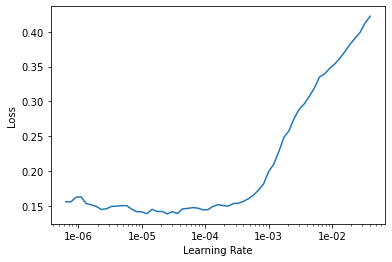

In [58]:
learn_gender.recorder.plot()

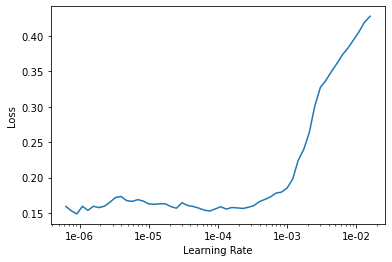

In [55]:
learn_gender.recorder.plot()

In [56]:
learn_gender.unfreeze()

epoch,train_loss,valid_loss,accuracy,time
0,0.147514,0.168198,0.927895,02:16
1,0.142828,0.165245,0.930673,02:17
2,0.146040,0.162718,0.931598,02:18
3,0.137342,0.164635,0.930673,02:18
4,0.147544,0.160763,0.934273,02:18
5,0.141804,0.159826,0.934479,02:18
6,0.140884,0.156339,0.934479,02:19
7,0.141019,0.160556,0.932113,02:19
8,0.139371,0.154792,0.934581,02:19
9,0.126989,0.150721,0.936947,02:19


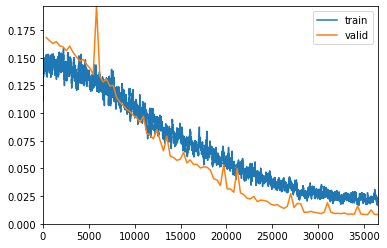

Better model found at epoch 0 with valid_loss value: 0.16819755733013153.
Better model found at epoch 1 with valid_loss value: 0.16524484753608704.
Better model found at epoch 2 with valid_loss value: 0.16271808743476868.
Better model found at epoch 4 with valid_loss value: 0.16076308488845825.
Better model found at epoch 5 with valid_loss value: 0.1598256528377533.
Better model found at epoch 6 with valid_loss value: 0.1563389152288437.
Better model found at epoch 8 with valid_loss value: 0.15479157865047455.
Better model found at epoch 9 with valid_loss value: 0.1507209837436676.
Better model found at epoch 10 with valid_loss value: 0.14695636928081512.
Better model found at epoch 12 with valid_loss value: 0.1440194845199585.
Better model found at epoch 13 with valid_loss value: 0.1406400501728058.
Better model found at epoch 14 with valid_loss value: 0.1346856653690338.
Better model found at epoch 16 with valid_loss value: 0.13306404650211334.
Better model found at epoch 17 with val

In [59]:
learn_gender.fit_one_cycle(100, max_lr=slice(1e-6,3e-4), 
                           callbacks=[callbacks.SaveModelCallback(learn_gender, 
                                                                  every='improvement', 
                                                                  monitor='valid_loss', 
                                                                  name='stage-2')])

In [ ]:
learn_gender.save('stage-2-rn50-gender-utk')

## Calculate accuracy

In [5]:
df_train, df_valid = get_df_files(concept='all', df_all_concepts=True)

In [6]:
df_train = df_train.drop(columns=['label'])
df_valid = df_valid.drop(columns=['label'])

In [22]:
df_train.to_csv('df_train_UTKFace.csv', index=False)

In [23]:
df_valid.to_csv('df_valid_UTKFace.csv', index=False)

In [32]:
model_gender = get_pytorch_model(weights_dir = 'models', 
                                 weights_file = 'stage-2-rn50-gender-utk.pth', 
                                 is_torch = False, num_classes = 2)

In [33]:
model_gender.eval()
print(next(model_gender.parameters()).is_cuda)

True


In [49]:
train_dl = get_dataloader(kwargs_func=kwargs, batch_size=20, pd_advx=df_train, 
                    root_dir='', img_pkl_file=None, is_for_train=False)

In [51]:
train_acc = np.round(get_gen_acc(train_dl, model_gender, concept_index=1)/len(df_train)*100, 2)

In [52]:
print(f"accuracy of gender model on train data: {train_acc}%")

accuracy of gender model on train data: 99.49%


In [25]:
valid_dl = get_dataloader(kwargs_func=kwargs, batch_size=20, pd_advx=df_valid, 
                    root_dir='', img_pkl_file=None, is_for_train=False)

In [47]:
valid_acc = np.round(get_gen_acc(valid_dl, model_gender, concept_index=1)/len(df_valid)*100, 2)

99.14


In [48]:
print(f"accuracy of gender model on validation data: {valid_acc}%")

accuracy of gender model on validation data: 99.14%


In [27]:
df_valid_0 = df_valid.loc[df_valid['gender'].isin([0])]

valid_dl_0 = get_dataloader(kwargs_func=kwargs, batch_size=20, pd_advx=df_valid_0, 
                    root_dir='', img_pkl_file=None, is_for_train=False)

valid_acc_0 = np.round(get_gen_acc(valid_dl_0, model_gender, 
                                   concept_index=1)/len(df_valid_0)*100, 2)

In [35]:
print(f"accuracy of gender model on validation data for male gender: {valid_acc_0}%")

accuracy of gender model on validation data for male gender: 99.33%


In [36]:
df_valid_1 = df_valid.loc[df_valid['gender'].isin([1])]

valid_dl_1 = get_dataloader(kwargs_func=kwargs, batch_size=20, pd_advx=df_valid_1, 
                    root_dir='', img_pkl_file=None, is_for_train=False)

valid_acc_1 = np.round(get_gen_acc(valid_dl_1, model_gender, 
                                   concept_index=1)/len(df_valid_1)*100, 2)

In [39]:
print(f"accuracy of gender model on validation data for female gender: {valid_acc_1}%")

accuracy of gender model on validation data for female gender: 98.99%


In [48]:
df_advx_gender_00 = df_valid[(df_valid['gender'] == 0) & (df_valid['age'] == 0)].head(250)

In [49]:
df_advx_gender_01 = df_valid[(df_valid['gender'] == 0) & (df_valid['age'] == 1)].head(250)

In [50]:
df_advx_gender_10 = df_valid[(df_valid['gender'] == 1) & (df_valid['age'] == 0)].head(250)

In [51]:
df_advx_gender_11 = df_valid[(df_valid['gender'] == 1) & (df_valid['age'] == 1)].head(250)

In [53]:
df_advx_gender = pd.concat([df_advx_gender_00, df_advx_gender_01, df_advx_gender_10, df_advx_gender_11])

In [57]:
df_advx_gender.sample(frac=1)

,name,age,gender,ethnicity
476,crop_part1/58_1_0_20170109150657263.jpg.chip.jpg,1,1,0
1009,crop_part1/65_0_0_20170111204914864.jpg.chip.jpg,1,0,0
1224,crop_part1/110_1_1_20170110155201038.jpg.chip.jpg,1,1,1
580,crop_part1/48_1_3_20170104220351694.jpg.chip.jpg,1,1,1
717,crop_part1/39_0_0_20170104204347174.jpg.chip.jpg,1,0,0
...,...,...,...,...
426,crop_part1/8_1_0_20170109201053203.jpg.chip.jpg,0,1,0
1093,crop_part1/85_1_0_20170110181049060.jpg.chip.jpg,1,1,0
632,crop_part1/49_1_0_20170109142131660.jpg.chip.jpg,1,1,0
779,crop_part1/52_1_0_20170103163641032.jpg.chip.jpg,1,1,0


In [66]:
df_advx_gender.to_csv('df_gender_age_UTKFace.csv', index=False)

In [67]:
df = pd.read_csv('df_gender_age_UTKFace.csv')

In [63]:
import pickle

In [64]:
pd_advx = pickle.load(open('pd_advx_glasses_gender_1000.pkl', 'rb'))

In [65]:
pd_advx

,image_id,Attractive,Eyeglasses,Male,Young
image_id,,,,,
166036.jpg,166036.jpg,0,1,1,0
168108.jpg,168108.jpg,0,1,1,1
174896.jpg,174896.jpg,0,1,1,0
165828.jpg,165828.jpg,0,1,1,0
175602.jpg,175602.jpg,1,1,1,1
...,...,...,...,...,...
166994.jpg,166994.jpg,1,0,1,0
167423.jpg,167423.jpg,0,0,1,0
168889.jpg,168889.jpg,0,0,1,1
